In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy import table
from astropy.coordinates import SkyCoord
import astropy.units as u
import h5py
import os
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
import matplotlib
# matplotlib.rcParams['text.usetex'] = True


## Make a KDE plot of the separations for KN, AGN, TDE and SLSN (to represent one of the Sersic-based separations)

In [57]:
def get_sep(scotchdir, classname, zlimit=None):
    full_info = []
    for file in os.listdir(scotchdir+classname):        
        if "HEAD" in file:
            head = table.Table.read(scotchdir+'/'+classname+'/'+file, format='fits').to_pandas()
            full_info.append(head)
    full = pd.concat(full_info)
    full = full[full['HOSTGAL_RA']!=-999] # remove the no-host events
    if zlimit is not None:
        full = full[full['HOSTGAL_SPECZ']<zlimit]
    c2 = SkyCoord(full['HOSTGAL_RA'].values*u.deg, full['HOSTGAL_DEC'].values*u.deg, frame='icrs')
    c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
    sep = c1.separation(c2)
    redshift = np.asarray(full['HOSTGAL_SPECZ'])
    sep_phys = cosmo.kpc_proper_per_arcmin(redshift)*sep.to(u.arcmin)
    return sep_phys, redshift

In [3]:
ls /global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH_ZLIM_V2/

MLAG_SCOTCH_ZLIM_AGN01/             MLAG_SCOTCH_ZLIM_SNIIn-MOSFIT/
MLAG_SCOTCH_ZLIM_AGN20/             MLAG_SCOTCH_ZLIM_SNIa-91bg/
MLAG_SCOTCH_ZLIM_KN_B19/            MLAG_SCOTCH_ZLIM_SNIa-SALT2/
MLAG_SCOTCH_ZLIM_KN_K17/            MLAG_SCOTCH_ZLIM_SNIax/
MLAG_SCOTCH_ZLIM_SLSN-I/            MLAG_SCOTCH_ZLIM_SNIb+HostXT_V19/
MLAG_SCOTCH_ZLIM_SNII+HostXT_V19/   MLAG_SCOTCH_ZLIM_SNIb-Templates/
MLAG_SCOTCH_ZLIM_SNII-NMF/          MLAG_SCOTCH_ZLIM_SNIc+HostXT_V19/
MLAG_SCOTCH_ZLIM_SNII-Templates/    MLAG_SCOTCH_ZLIM_SNIc-Templates/
MLAG_SCOTCH_ZLIM_SNIIb+HostXT_V19/  MLAG_SCOTCH_ZLIM_SNIcBL+HostXT_V19/
MLAG_SCOTCH_ZLIM_SNIIn+HostXT_V19/  MLAG_SCOTCH_ZLIM_TDE/


In [65]:
scotchdir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH_ZLIM_V2/"
sep_phys_snia = get_sep(scotchdir, "MLAG_SCOTCH_ZLIM_SNIa-SALT2", zlimit=0.25)
sep_phys_tde  = get_sep(scotchdir, "MLAG_SCOTCH_ZLIM_TDE", zlimit=0.25)
sep_phys_agn  = get_sep(scotchdir, "MLAG_SCOTCH_ZLIM_AGN01", zlimit=0.25)
sep_phys_kn   = get_sep(scotchdir, "MLAG_SCOTCH_ZLIM_KN_K17", zlimit=0.25)
sep_phys_ibc  = np.concatenate((get_sep(scotchdir, "MLAG_SCOTCH_ZLIM_SNIb+HostXT_V19", zlimit=0.25), get_sep(scotchdir, "MLAG_SCOTCH_ZLIM_SNIc+HostXT_V19", zlimit=0.25), get_sep(scotchdir, "MLAG_SCOTCH_ZLIM_SNIb-Templates/", zlimit=0.25), get_sep(scotchdir, "MLAG_SCOTCH_ZLIM_SNIc-Templates/", zlimit=0.25)))
sep_phys_ii   = get_sep(scotchdir, "MLAG_SCOTCH_ZLIM_SNII-Templates", zlimit=0.25)
sep_phys_kn_z1, z = get_sep(scotchdir,"MLAG_SCOTCH_ZLIM_KN_K17", zlimit=1)


In [5]:
# import real data from the Young Supernova Experiment (YSE)
yse_data  = pd.read_csv('/global/u2/m/mlokken/transient-host-sims/data_files/sn_offset_for_alex_and_martine.csv')
yse_classes = []
for cl in yse_data['spec_class']:
    if cl not in yse_classes:
        yse_classes.append(cl)
yse_classes

['SNII',
 'SNIa-norm',
 nan,
 'SNIIn',
 'SNIc',
 'SNIb',
 'SNIbn',
 'SNIa-91T-like',
 'SNIa-CSM',
 'SN',
 'SNIa-SC',
 'SNIc-BL',
 'SNIIb',
 'SNIax',
 'TDE',
 'SLSN-II',
 'LBV',
 'LRN',
 'SNIa-91bg-like',
 'SNIb-pec',
 'SLSN-I',
 'Other']

In [6]:
yse_snia  = yse_data[yse_data['spec_class']=='SNIa-norm']
yse_tde   = yse_data[yse_data['spec_class']=='TDE']
yse_allsn = []
for i in range(len(yse_data)):
    if yse_data.iloc[i]['spec_class'] not in ['NaN', 'nan', np.nan, 'TDE', 'LBV', 'LRN']:
        yse_allsn.append(yse_data.iloc[i])
yse_allsn = pd.concat(yse_allsn)

In [7]:
# import real data from Yen-Chen
yc_CCSN  = np.loadtxt('/global/u2/m/mlokken/transient-host-sims/data_files/CCSN_offset.txt')
yc_Ia    = np.loadtxt('/global/u2/m/mlokken/transient-host-sims/data_files/Ia_offset.txt')
yc_Ibc   = np.loadtxt('/global/u2/m/mlokken/transient-host-sims/data_files/Ibc_offset.txt')
yc_LGRB  = np.loadtxt('/global/u2/m/mlokken/transient-host-sims/data_files/LGRB_offset.txt')
yc_SGRB  = np.loadtxt('/global/u2/m/mlokken/transient-host-sims/data_files/sGRB_offset.txt')

In [8]:
# #    if obs_array is not None:
#         sep = np.concatenate(scotch_array,obs_array)
#         class_labels = scotch_class+obs_class
#     else:
#         sep = np.concatenate(scotch_array)
#         class_labels = scotch_class
#     df = pd.DataFrame({
#     'Separation': sep,
#     'Class': class_labels,
# })

In [70]:
def kde_plot_SN_sep(scotch_array, scotch_class, color_list, obs_array=None, obs_class=None, savefile=None):
    sns.set(font_scale=1.5, rc={'text.usetex' : True})
    sns.set_style(style='white') 
    # sns.set_context("paper")
    if obs_array is not None:
        color_list = color_list+color_list
    for i in range(len(scotch_array)):
        sns.kdeplot(x=scotch_array[i], label=scotch_class[i], color=color_list[i], log_scale=True)
        if obs_array is not None:
            sns.kdeplot(x=obs_array[i], label=obs_class[i], color=color_list[i], log_scale=True, linestyle='dashed')
    plt.xlabel("Separation [physical kpc]")
    plt.xlim([10**-3, 10**2])
    plt.ylim([0,1.05])
    plt.legend()
    plt.show()
    plt.clf()
    for i in range(len(scotch_array)):
        sns.ecdfplot(x=scotch_array[i], label=scotch_class[i], color=color_list[i], log_scale=True, linestyle='solid')
        if obs_array is not None:
            sns.ecdfplot(x=obs_array[i], label=obs_class[i], color=color_list[i], log_scale=True, linestyle='dashed')
    plt.xlabel("Offset [physical kpc]")
    plt.ylabel("Cumulative Fraction")
    plt.xlim([10**-3, 10**2])
    plt.legend()
    plt.ylim([0,1.05])
    plt.tight_layout()
    plt.savefig(savefile,dpi=100)
    plt.show()
    plt.clf()


In [71]:
cmap = matplotlib.cm.get_cmap('Dark2')
color_list = [cmap(i) for i in np.linspace(0,1,4)]

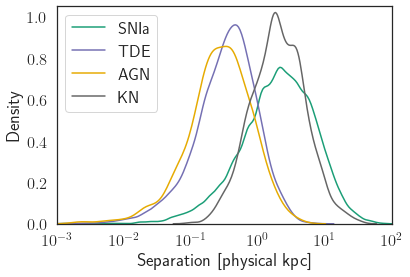

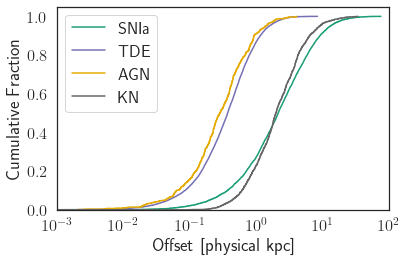

<Figure size 432x288 with 0 Axes>

In [79]:
sep_array_SCOTCH = (sep_phys_snia.value,sep_phys_tde.value,sep_phys_agn.value,sep_phys_kn.value)
class_labels_SCOTCH = ['SNIa','TDE','AGN','KN']
kde_plot_SN_sep(sep_array_SCOTCH,class_labels_SCOTCH, color_list, savefile="../../plots/scotch_separations_4class.png")

/global/common/software/nersc/cori-2022q1/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


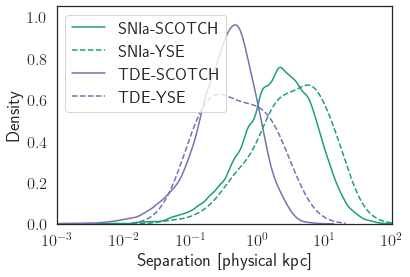

/global/common/software/nersc/cori-2022q1/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


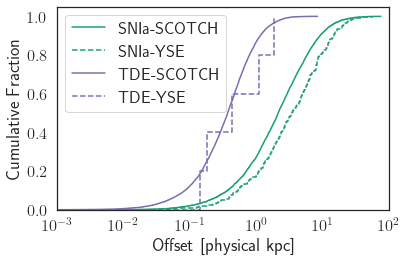

<Figure size 432x288 with 0 Axes>

In [80]:
sep_array_YSE = (yse_snia['SN_offset'], yse_tde['SN_offset'])
class_labels_YSE = ['SNIa-YSE','TDE-YSE']
sep_array_SCOTCH_YSEcompare = (sep_phys_snia.value,sep_phys_tde.value)
class_labels_SCOTCH_YSEcompare = ['SNIa-SCOTCH', 'TDE-SCOTCH']
kde_plot_SN_sep(sep_array_SCOTCH_YSEcompare, class_labels_SCOTCH_YSEcompare, [color_list[0],color_list[1]], sep_array_YSE,class_labels_YSE, "../../plots/scotch_separations_YSE_comparison.png" )


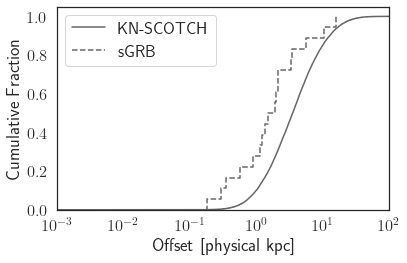

In [82]:
sep_array_YC = yc_SGRB
class_labels_YC = ['sGRB']
sep_array_SCOTCH_YCcompare = sep_phys_kn_z1.value
class_labels_SCOTCH_YCcompare = ['KN-SCOTCH']

sns.ecdfplot(x=sep_array_SCOTCH_YCcompare, label='KN-SCOTCH', color=color_list[3], log_scale=True, linestyle='solid')
sns.ecdfplot(x=sep_array_YC, label='sGRB', color=color_list[3], log_scale=True, linestyle='dashed')
plt.xlabel("Offset [physical kpc]")
plt.ylabel("Cumulative Fraction")
plt.xlim([10**-3, 10**2])
plt.legend()
plt.ylim([0,1.05])
plt.tight_layout()
plt.savefig("../../plots/scotch_separations_YC_comparison.png",dpi=100)

# Test the TDE separations from using MXINTFLUX=0.2 in a 10k run

In [86]:
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH_ZLIM_V2/MLAG_SCOTCH_ZLIM_TDE/"
TDE_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    TDE_head_fn = transDir + "MLAG_SCOTCH_ZLIM_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    TDE_head = table.Table.read(TDE_head_fn, format='fits').to_pandas()
    TDE_heads.append(TDE_head)
TDE = pd.concat(TDE_heads)
TDE = TDE[TDE['HOSTGAL_RA']!=-999]

In [87]:
c2 = SkyCoord(TDE['HOSTGAL_RA'].values*u.deg, TDE['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_tde = c1.separation(c2)
redshift_tde = np.asarray(TDE['HOSTGAL_SPECZ'])
sep_phys_tde = cosmo.kpc_proper_per_arcmin(redshift_tde)*sep_tde.to(u.arcmin)
tde_hostgal_rad = TDE['HOSTGAL_SQRADIUS']

Text(0.5, 0, 'Separation in kpc proper')

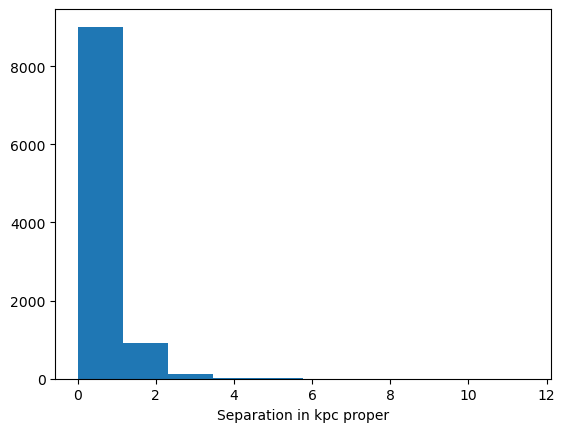

In [88]:
plt.hist(sep_phys_tde.value)
plt.xlabel("Separation in kpc proper")

Text(0.5, 0, 'Separation in arcsec')

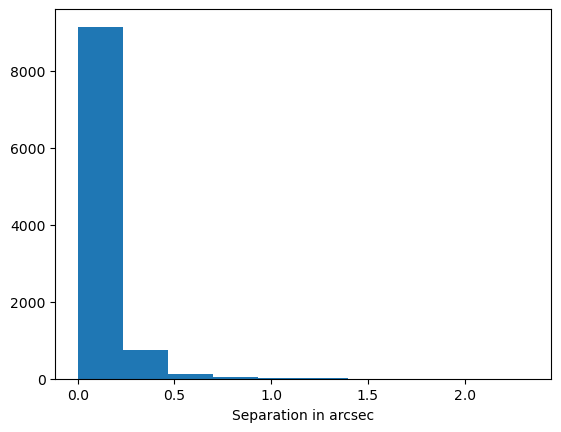

In [89]:
plt.hist(sep_tde.to(u.arcsec).value)
plt.xlabel("Separation in arcsec")

In [90]:
# compare with a more typical transient from SCOTCH
f    = h5py.File("/global/cscratch1/sd/mlokken/sn_hostenv/scotch_submitted/scotch_zlim.hdf5", "a")
slsn = f['TransientTable']['SLSN-I']['SLSN-I']
sep_slsn  = list(slsn['sep'][0:1000])
redshift_slsn    = list(slsn['z'][0:1000])

Text(0.5, 0, 'Separation in kpc proper')

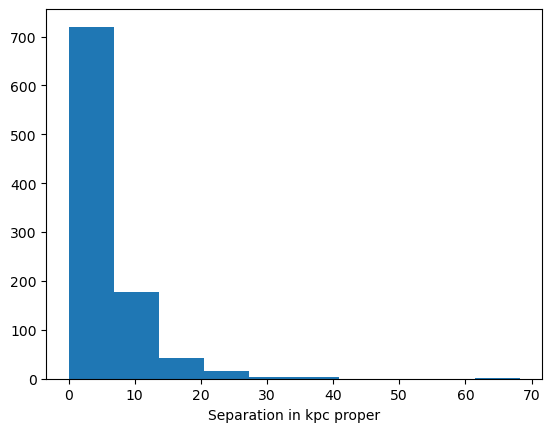

In [91]:
sep_phys_slsn = cosmo.kpc_proper_per_arcmin(redshift_slsn).to(u.kpc/u.arcsec)*sep_slsn*u.arcsec
plt.hist(sep_phys_slsn.value)
plt.xlabel("Separation in kpc proper")

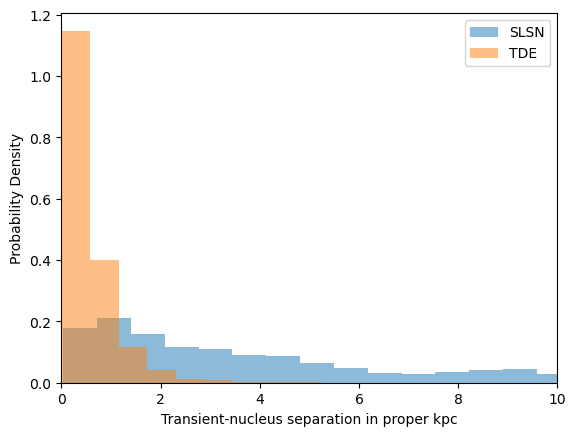

In [92]:
plt.hist(sep_phys_slsn.value, label='SLSN', alpha=.5, bins=100, density=True)
plt.hist(sep_phys_tde.value, label='TDE', alpha=.5, bins=20, density=True)
plt.xlabel("Transient-nucleus separation in proper kpc")
plt.ylabel("Probability Density")
plt.xlim([0,10])
plt.legend()

# Repeat for KN

In [93]:
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/MLAG_SCOTCH10k_KN_K17/"

KN_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    KN_head_fn = transDir + "MLAG_GP_SCOTCH10k_KN_MNINTFLUX_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    KN_head = table.Table.read(KN_head_fn, format='fits').to_pandas()
    KN_heads.append(KN_head)
KN = pd.concat(KN_heads)

In [94]:
KN['HOSTGAL_ELLIPTICITY'].iloc[np.where(KN['HOSTGAL_DEC']==-999)]

16    -9999.0
17    -9999.0
23    -9999.0
50    -9999.0
54    -9999.0
        ...  
215   -9999.0
221   -9999.0
222   -9999.0
234   -9999.0
249   -9999.0
Name: HOSTGAL_ELLIPTICITY, Length: 80, dtype: float32

Text(0.5, 0, 'arcsec')

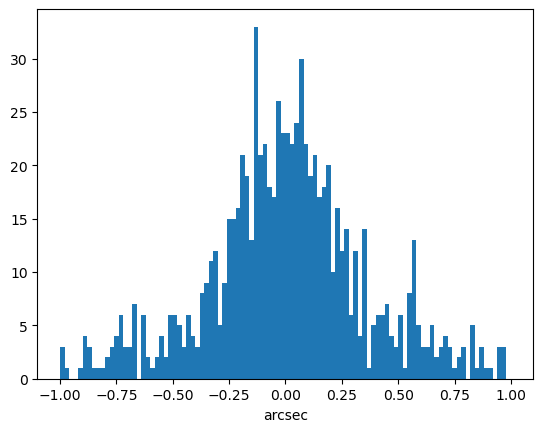

In [95]:
plt.hist(KN['HOSTGAL_DEC']*3600, range=[-1,1], bins=100)
plt.xlabel("arcsec")

Text(0.5, 0, 'RA [arcsec]')

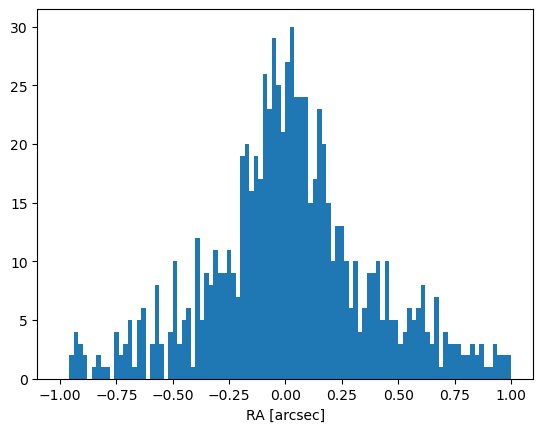

In [96]:
plt.hist(KN['HOSTGAL_RA']*3600, range=[-1,1], bins=100)
plt.xlabel("RA [arcsec]")

In [97]:
KN = KN.iloc[np.where(KN['HOSTGAL_RA']!=-999)]
# there is a problem with -999s

In [98]:
c2 = SkyCoord(KN['HOSTGAL_RA'].values*u.deg, KN['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_kn = c1.separation(c2)
redshift_kn = np.asarray(KN['HOSTGAL_SPECZ'])
sep_phys_kn = cosmo.kpc_proper_per_arcmin(redshift_kn)*sep_kn.to(u.arcmin)
kn_hostgal_rad = KN['HOSTGAL_SQRADIUS']

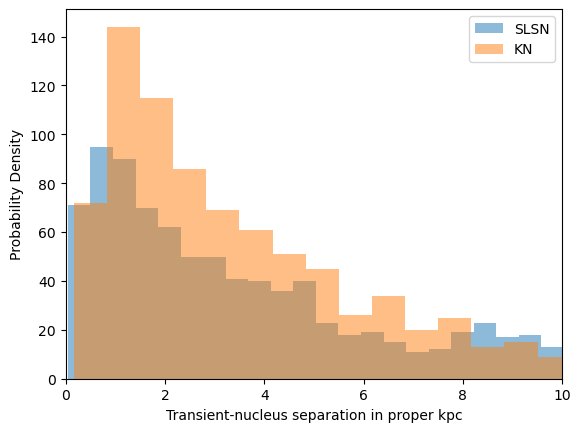

In [99]:
plt.hist(sep_phys_slsn.value, label='SLSN', alpha=.5, bins=150)
plt.hist(sep_phys_kn.value, label='KN', alpha=.5, bins=100)
plt.xlabel("Transient-nucleus separation in proper kpc")
plt.ylabel("Probability Density")
plt.xlim([0,10])
plt.legend()

# Test the new AGN separations from using MXINTFLUX=0.1 in the full runs, compare to original SCOTCH

In [100]:
scotch = h5py.File("/global/cscratch1/sd/mlokken/sn_hostenv/scotch_submitted/scotch_z3.hdf5", "r")

In [101]:
scotch_trans = scotch['TransientTable']

In [102]:
sep_AGN_scotch = scotch_trans['AGN']['AGN01']['sep'][:]
scotch.close()

In [104]:
# new AGN
transDir = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH_ZLIM_V2/MLAG_SCOTCH_ZLIM_AGN20/"
AGN_heads = []
for selection in ('0003', '0012', '0024', '0032'): # some random head files
    AGN_head_fn = transDir + "MLAG_SCOTCH_ZLIM_NONIaMODEL0-{:s}_HEAD.FITS.gz".format(selection)
    AGN_head = table.Table.read(AGN_head_fn, format='fits').to_pandas()
    AGN_heads.append(AGN_head)
AGN = pd.concat(AGN_heads)
AGN = AGN[AGN['HOSTGAL_RA']!=-999]

In [105]:
c2 = SkyCoord(AGN['HOSTGAL_RA'].values*u.deg, AGN['HOSTGAL_DEC'].values*u.deg, frame='icrs')
c1 = SkyCoord(0.0*u.deg, 0.0*u.deg, frame='icrs')
sep_agn = c1.separation(c2)
redshift_agn = np.asarray(AGN['HOSTGAL_SPECZ'])
sep_phys_agn = cosmo.kpc_proper_per_arcmin(redshift_agn)*sep_agn.to(u.arcmin)


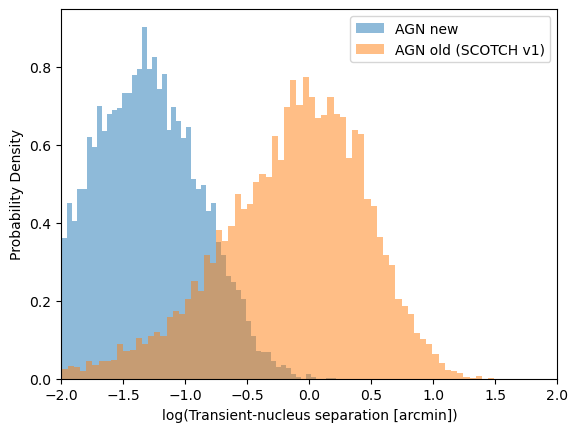

In [106]:
plt.hist(np.log10(sep_agn.to('arcsec').value), label='AGN new', alpha=.5, bins=100, density=True)
plt.hist(np.log10(sep_AGN_scotch), label='AGN old (SCOTCH v1)', alpha=.5, bins=100, density=True)
plt.xlabel("log(Transient-nucleus separation [arcmin])")
plt.ylabel("Probability Density")
plt.xlim([-2,2])
plt.legend()